# **STAGE PONTS INSTRUMENTES - Notebook 2**

## Table of Contents

### 0. [Bibliothèques](#0/-Bibliothèques)
### I. [Analyse d'un signal](#I/-Analyse-d'un-signal)
### II. [Isolement des 5 premiers mètres d'un signal](#II/-Isolement-des-5-premiers-mètres-du-signal)
### III. [Calcul de l'écart-type](#III/-Calcul-de-l'écart-type-sur-cette-portion-de-signal)
### IV. [Mise sous forme de fonction](#IV/-Calcul-de-l'écart-type-du-bruit-d'un-signal-sous-forme-de-fonction)



## 0/ Bibliothèques

In [4]:
from Bwifsttar import load_senlis_modified
from Previous_files.plot import show_signal
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 
import statsmodels.api as sm


## I/ Analyse d'un signal

Nous voulons savoir quelle partie du signal isolée pour estimé le bruit de celui-ci

In [5]:
calibration_trucks,traffic_trucks = load_senlis_modified(selected=6) #[3,4,6,7]
truck = calibration_trucks[0]

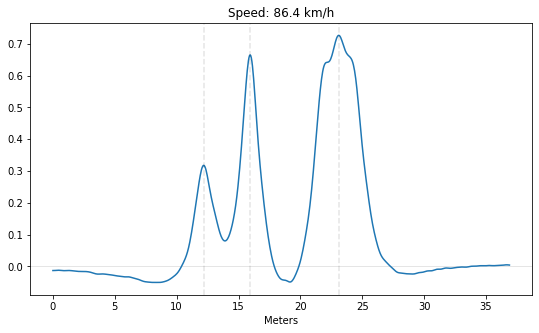

In [6]:
signal_0 = calibration_trucks[0].signals
show_signal(calibration_trucks[0])

## II/ Isolement des 5 premiers mètres du signal

107


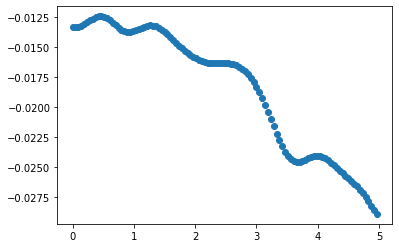

In [7]:
meters = truck.time*truck.speed

def get_idx_five_meters(meters,distance):
    """
        Données :
            - meters : Liste des mètres pour un camion (truck.time*truck.speed)
            - distance : Distance de laquelle nous voulons déduire l'indice
        Sorties :
            - i : indice de la liste 'meters' (paramètre) à partir duquel le camion a parcouru plus de **distance** mètres
        Fonction : Retourne l'indice à partir duquel on a parcouru plus de **distance** m dans la liste meters.
    """
    i=0

    for meter in meters:
        if meter>distance:
            return i
        
        else:
            i=i+1
            
idx_five_meters = get_idx_five_meters(meters,5)     
print(idx_five_meters)

#meters = meters[0:175]
plt.scatter(meters[0:idx_five_meters],truck.signals[0:idx_five_meters])


## III/ Calcul de l'écart-type sur cette portion de signal


Nous avons ici choisi de passer par une régression linéaire pour déterminer l'écart-type des 5 premiers mètres du signal (correspondant au bruit). 
Le résultat est la racine du RSS obtenu.

Score régression : 0.9187385871956739
Fonction de la forme :  -0.009912632705958472-0.0034436607539461727*x
[-0.00344366]
-0.009912632705958472


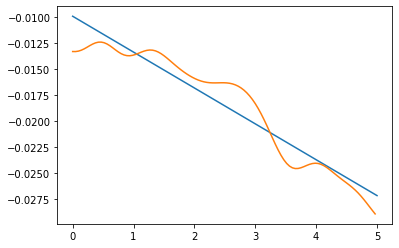

In [8]:
transformer = PolynomialFeatures(degree=1, include_bias=False)

x = meters[0:idx_five_meters].reshape(-1,1)
y = truck.signals[0:idx_five_meters]

transformer.fit(x)
x_ = transformer.transform(x)


reg = LinearRegression().fit(x, y)
print("Score régression :" ,reg.score(x,y))
print("Fonction de la forme : ",str(reg.intercept_)+str(reg.coef_[0])+"*x")
print(reg.coef_)
print(reg.intercept_)

def reg_lin(x):
    return reg.intercept_+reg.coef_[0]*x
    #return 0.01 - 0.004*x
x_fin = np.linspace(0,5)
y_fin = reg_lin(x_fin)
plt.plot(x_fin,y_fin)
plt.plot(meters[0:idx_five_meters],truck.signals[0:idx_five_meters])


In [9]:
#AUTRE MÉTHODE
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1187.
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.76e-59
Time:                        22:24:40   Log-Likelihood:                 545.15
No. Observations:                 107   AIC:                            -1086.
Df Residuals:                     105   BIC:                            -1081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0099      0.000    -34.491      0.0

## IV/ Calcul de l'écart-type du bruit d'un signal sous forme de fonction

In [10]:

def get_std(truck):
    """
        Données :
            -truck : Camion (type namedTuple truck)
        Sorties :
            - std_noise : Ecart-type du bruit du signal d'un camion
        Fonction : Retourne l'écart type du bruit du signal d'un camion par régression linéaire
    """
    from sklearn.linear_model import LinearRegression
    import numpy as np
    import math
    
    meters = truck.speed*truck.time
    idx_five_meters = get_idx_five_meters(meters,5)#on fixe la distance à 5m car c'est là que nous observons en partie le bruit
    x = meters[0:idx_five_meters].reshape(-1,1)
    y = truck.signals[0:idx_five_meters]

    reg = LinearRegression().fit(x, y)
    
    rss = np.sum((y-reg.predict(x))**2)
    std_noise = math.sqrt(rss)
    return std_noise

print(get_std(truck))

0.015338175742281756
